In [1]:
using CSV, DataFrames, FITSIO
using Random
using PyPlot
using FITSTables

┌ Info: Recompiling stale cache file /Users/aw/.julia/compiled/v1.1/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/aw/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/aw/.julia/compiled/v1.1/FITSTables/axlF7.ji for FITSTables [7c1f5dd0-abd1-46fd-a3fe-70b5915849d6]
└ @ Base loading.jl:1184


In [2]:
df = FITS(f->DataFrame(f[2]), "../cats/LAMOST-dr5-v3-stellar.fits.gz") ;
df = df[:, [:obsid, :feh, :snrz, :teff, :logg]] ;

In [10]:
Random.seed!(1)
CSV.write("one_tenth_of_lamost_dr5.csv", df[rand(size(df, 1)) .< 0.1, [:obsid]]);

# random

In [6]:
Random.seed!(12345)
CSV.write("random_30000.csv", DataFrame(obsid=rand(df.obsid, 30000)));

# top S/N and distributed

In [18]:
Random.seed!(1)
N = 1000;
highsnrdf = df#[df.snrz .> 300 , :]
size(highsnrdf)

(5348712, 5)

In [19]:
p = []
while length(p) < N
    feh = rand()*3.5 - 2.5
    teff = rand()*6000 + 3000
    logg = rand()*5

    dists = (highsnrdf.teff .- teff).^2 .+ 1e6*(highsnrdf.logg .- logg).^2 .+ 1e6*(highsnrdf.feh .- feh).^2
    i = argmin(dists)
    if (dists[i] < 1e4) && (! in(i, p))
        push!(p, i)
    end
end

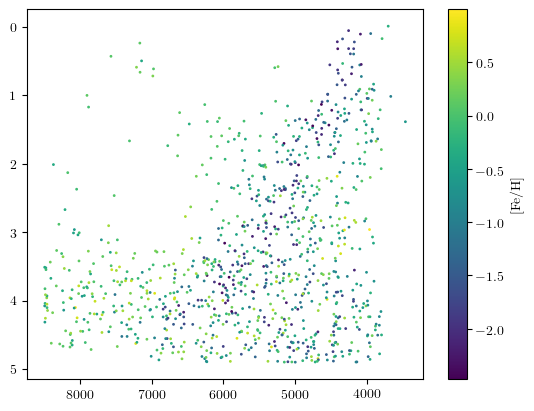

In [20]:
scatter(highsnrdf.teff[p], highsnrdf.logg[p], c=highsnrdf.feh[p], s=1)
colorbar(label="[Fe/H]")
gca().invert_yaxis()
gca().invert_xaxis()

In [21]:
CSV.write("distributed_DR5_$(N).csv", highsnrdf[p, [:obsid]])

"distributed_DR5_1000.csv"

# top S/N vs random vs distributed

In [98]:
N = 1000;

In [99]:
p = partialsortperm(df.snrz, 1:N, rev=true)
CSV.write("top_SNR_DR2.csv", df[p, [:obsid]])

"top_SNR_DR2.csv"

In [100]:
p = rand(1:size(df, 1), N)
CSV.write("random_DR2.csv", df[p, [:obsid]])

"random_DR2.csv"

In [101]:
p = []
while length(p) < 1000
    feh = rand()*3.5 - 2.5
    teff = rand()*6000 + 3000
    logg = rand()*5

    dists = (df.teff .- teff).^2 .+ 1e6*(df.logg .- logg).^2 .+ 1e6*(df.feh .- feh).^2

    #println("$feh $teff $logg")
    #println(sqrt(minimum(dists)))
    #println(df[argmin(dists), [:feh, :teff, :logg]])
    
    if minimum(dists) < 1e4
        push!(p, argmin(dists))
    end
end

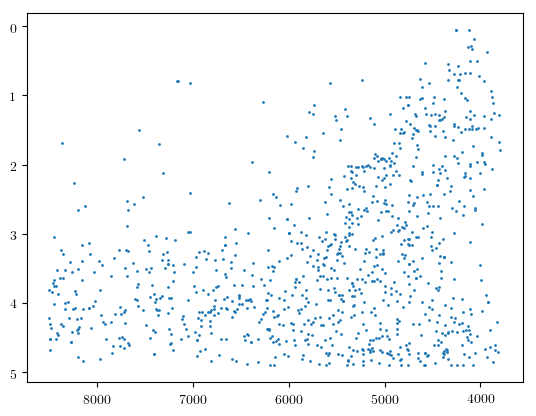

In [106]:
scatter(df.teff[p], df.logg[p], s=1)
gca().invert_yaxis()
gca().invert_xaxis()

In [104]:
CSV.write("distributed_DR2.csv", df[p, [:obsid]])

"distributed_DR2.csv"

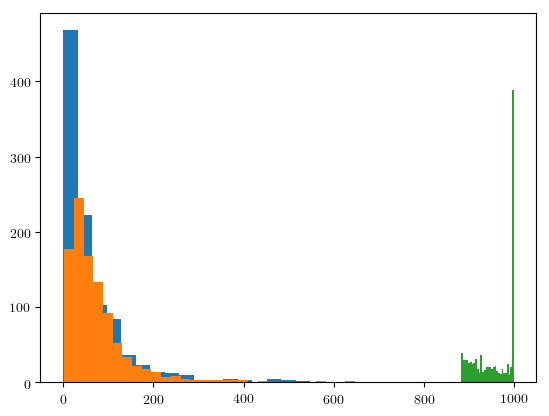

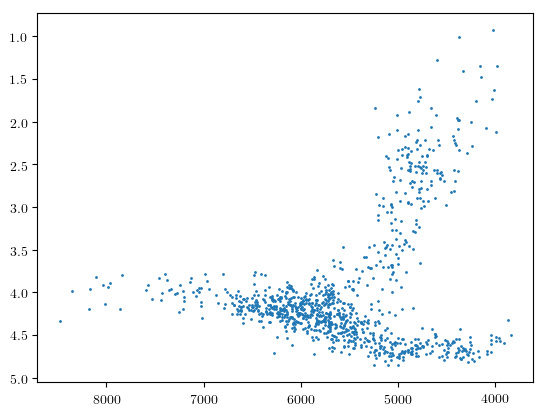

In [115]:
plt.hist(df[p, :snrz], bins=30)
pr = rand(1:size(df, 1), N)
plt.hist(df[pr, :snrz], bins=30)
ps = partialsortperm(df.snrz, 1:N, rev=true)
plt.hist(df[ps, :snrz], bins=30)

figure()
#scatter(df.teff[p], df.logg[p], s=1)
scatter(df.teff[pr], df.logg[pr], s=1)
#scatter(df.teff[ps], df.logg[ps], s=1)
gca().invert_yaxis()
gca().invert_xaxis()